<span style="color: orange; font-size: 26px; font-weight: bold;">
EDA final – Cardiovascular Disease Dataset
</span>

---

<span style="color: orange; font-size: 26px; font-weight: bold;">
1. Setup & Datenladen
</span>

---


 Imports:
1. Pandas
2. Numpy
3. Matplotlib
4. seaborn

In [1]:
import pandas as pd
print("pandas: " + pd.__version__)
import numpy as np
print("numpy:" + np.__version__)
import matplotlib.pyplot as plt
print("matplotlib: " + np.__version__)
import seaborn as sns
print("seaborn: " + sns.__version__)

print("All libraries imported!")
# Plots direkt im Notebook anzeigen
%matplotlib inline

pandas: 2.3.3
numpy:2.0.2
matplotlib: 2.0.2
seaborn: 0.13.2
All libraries imported!


In [2]:
# Pfad zum Datensatz
data_path = "data/raw/cardio_train.csv"
df = pd.read_csv(data_path, sep=";")
print("data is loaded")

data is loaded


Data Exploration:
Head, Info, Columns and shape

In [3]:
print("Shape:", df.shape) # gibt die form des DataFrames zurück

print("Head:")
display(df.head())      # erste 5 Zeilen

print("\nInfo:")
df.info()               # Datentypen + Missing Values

print("\nColumns:")
print(df.columns)       # Spaltennamen


Shape: (70000, 13)
Head:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

Columns:
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


 ---
<span style="color: orange; font-size: 26px; font-weight: bold;">
2. Feature-Overview
</span>


This section describes the content of the data set.
The following table shows all features with "Feature Name", "Category", "Column Name", "Data Type / Values", and "Description".

---

 **Cardiovascular Disease Dataset — Feature Overview**

| **Feature Name**                   | **Category**           | **Column Name** | **Data Type / Values**                  | **Description**                                |
|------------------------------------|------------------------|-----------------|------------------------------------------|------------------------------------------------|
| Age                               | Objective Feature      | `age`           | int (days)                              | Patient age (in days)                          |
| Height                            | Objective Feature      | `height`        | int (cm)                                | Patient height (centimeters)                   |
| Weight                            | Objective Feature      | `weight`        | float (kg)                              | Patient weight (kilograms)                     |
| Gender                            | Objective Feature      | `gender`        | categorical code                        | 1: woman, 2: man                               |
| Systolic blood pressure           | Examination Feature    | `ap_hi`         | int                                     | Systolic blood pressure (mm Hg)                |
| Diastolic blood pressure          | Examination Feature    | `ap_lo`         | int                                     | Diastolic blood pressure (mm Hg)               |
| Cholesterol                       | Examination Feature    | `cholesterol`   | 1: normal, 2: above normal, 3: well above normal | Cholesterol level                     |
| Glucose                           | Examination Feature    | `gluc`          | 1: normal, 2: above normal, 3: well above normal | Glucose level                         |
| Smoking                           | Subjective Feature     | `smoke`         | binary (0: no, 1: yes)                  | Whether patient smokes or not                  |
| Alcohol intake                    | Subjective Feature     | `alco`          | binary (0: no, 1: yes)                  | Whether patient consumes alcohol               |
| Physical activity                 | Subjective Feature     | `active`        | binary (0: no, 1: yes)                  | Whether patient is physically active           |
| Cardiovascular disease (target)   | Target Variable        | `cardio`        | binary (0: no, 1: yes)                  | Presence (1) or absence (0) of disease         |

#### **Value Encoding Notes**
- **`cholesterol` & `gluc`:**
  - 1 = normal
  - 2 = above normal
  - 3 = well above normal
- **`gender`:**
  - 1 = woman
  - 2 = man
- **`smoke`, `alco`, `active`, `cardio`:**
  - 0 = no
  - 1 = yes

---
<span style="color: orange; font-size: 26px; font-weight: bold;">
3. Basic statistics & data quality
</span>


This section looks at the basic statistics of the data set, 
checks for missing values, and flags any initial anomalies (e.g., unrealistic min/max values).

---



#### Describe:

In [4]:
print("-----------------------------------------------------------")
print("describe:")
print(df.describe())     # Basic statistics
print("-----------------------------------------------------------")

-----------------------------------------------------------
describe:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.22645

#### `df.describe()` Output — Statistic Meaning Table Explanation:

| **Statistic** | **Meaning**                                                                                                  |
|---------------|-------------------------------------------------------------------------------------------------------------|
| count         | Number of non-missing (non-NaN) entries per column (should be 70,000 for a complete dataset)                |
| mean          | Average value                                                                                               |
| std           | Standard deviation (spread/variability)                                                                     |
| min           | Minimum value found                                                                                         |
| 25%           | 25th percentile (lower quartile) — 25% of values are below this                                             |
| 50%           | Median (50th percentile) — half the values are below, half above                                            |
| 75%           | 75th percentile (upper quartile) — 75% of values are below this                                             |
| max           | Maximum value found                                                                                         |

#### **Analysis:**
####  `df.describe()` Output

##### **1. `id`**
- **Range:** 0 to 99,999 (but only 70,000 rows in the dataset).
- **Usage:** Just a row identifier; not relevant for analysis.

##### **2. `age`**
- **Mean:** 19,469 days (~53.3 years).
- **Min:** 10,798 days (~29.6 years).
- **Max:** 23,713 days (~64.9 years).
- **Distribution:** Most values (middle 50%) are between ~48 and ~58 years.
- **Action:** Age is in days—convert to years for easier interpretation.

##### **3. `gender`**
- **Values:** 1 or 2 (likely 1=woman, 2=man).
- **Distribution:** Median and quartiles show about half are coded as 1, half as 2.
- **Action:** Double-check the dataset documentation for the exact meaning of codes.

##### **4. `height`**
- **Mean:** 164.4 cm.
- **Min:** 55 cm (unrealistically low—likely an error).
- **Max:** 250 cm (unrealistically high—likely an error).
- **Distribution:** Median 165 cm, standard deviation 8.2 cm.
- **Action:** Check and possibly remove or fix extreme outlier values.

##### **5. `weight`**
- **Mean:** 74.2 kg.
- **Min:** 10 kg (very low, likely a data entry error).
- **Max:** 200 kg (high but possible).
- **Distribution:** Median 72 kg, standard deviation 14.4 kg.
- **Action:** Consider filtering out unrealistic values (e.g., <30 kg).

##### General Notes
- **All columns have 70,000 entries:** No missing values detected.
- **Watch for outliers:** `height` and `weight` have minimum values that are not realistic for adults.
- **Next steps:** Convert age to years, clean outliers in height and weight, continue with data exploration and visualization.


#### df.describe(): transposed overview

 In the next step, I look at the basic statistics for all numerical features.
 To do this, I use `df.describe().T` so that each row corresponds to one feature.

 Basic statistics for all numerical features (transposed)

#### Data Quality: Missing Values and noticeable extreme values

- In the **`count`** column of `df.describe()`, all features show the value **70 000**.  
  ⇒ This means there are **no missing values (Missing Values)** in the considered numerical columns.
- However, some minimum and maximum values appear implausible, for example in:
  - **`height`** (very small or very large body heights)
  - **`weight`** (extremely low or very high body weights)
  - **`ap_hi`** / **`ap_lo`** (blood pressure values that are hardly realistic from a medical point of view)

These values are examined in more detail in the **Outlier-Analyse** section and can later be filtered out
in the cleaning step.





### Missing Values & Data Quality Assessment

####  No Missing Values
- All 70,000 rows are completely present
- No missing values detected in numeric columns
- `count` column in `df.describe()` shows 70,000 for all features

####  Unrealistic Min/Max Values Detected
The following features show suspicious extreme values:

- **`height`:** values < 130cm or > 210cm (e.g., min=55cm, max=250cm)
- **`weight`:** values < 40kg or > 200kg (e.g., min=10kg, max=200kg)
- **`ap_hi` (systolic BP):** medically impossible values detected (e.g., > 10,000 mmHg)
- **`ap_lo` (diastolic BP):** illogical values (e.g., ap_lo > ap_hi, or extremely low)

---
<span style="color: orange; font-size: 26px; font-weight: bold;">
4. Univariate Distributions
</span>

---

#### **4.1 Demographics**

In this section, the demographic features **age**, **height**, **weight**, and **gender** are analyzed individually.


#### Age Distribution (in Years)

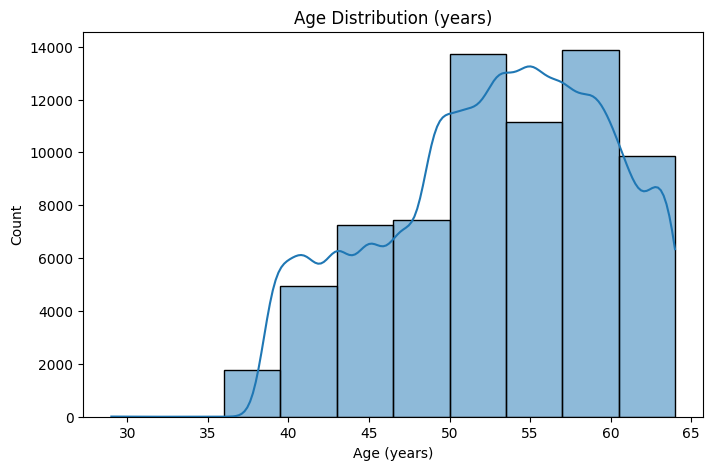

In [5]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)
# age in years instead of age in days
df = df.drop(columns=['age'])

plt.figure(figsize=(8,5))
sns.histplot(df['age_years'], bins=10, kde=True)
plt.title('Age Distribution (years)')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

---
#### Height and Weight Distributions

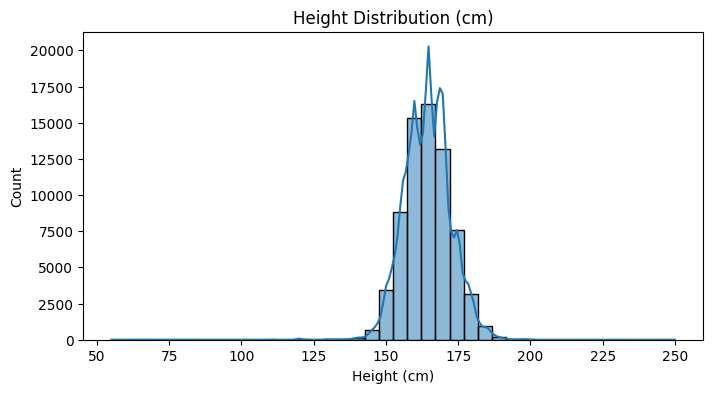

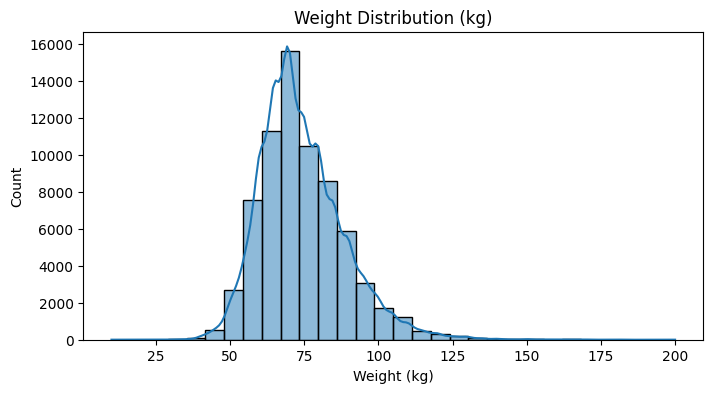

In [6]:
# Height
plt.figure(figsize=(8,4))
sns.histplot(df['height'], bins=40, kde=True, )
plt.title('Height Distribution (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

# Weight
plt.figure(figsize=(8,4))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

---
#### Gender Distribution

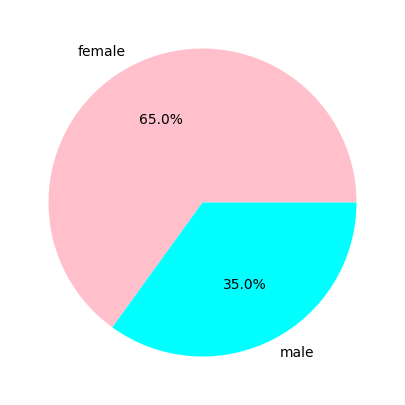

gender
1    45530
2    24470
Name: count, dtype: int64


In [7]:
count = df["gender"].value_counts()
label = ["female", "male"]
colors = ["pink", "cyan"]
plt.figure(figsize=(10,5))
plt.pie(count, labels=label, colors= colors,  autopct='%1.1f%%')
plt.show()
print(count)


### **Analysis:**
####  Height Distribution

- **Findings:**
  The height distribution shows a clear **normal (bell-shaped) curve** with most values clustered between 150–180cm.
  - The peak (mode) is around 165–170cm.
  - Few outliers exist below 125cm and above 200cm, but the majority are within a realistic adult range.
- **Interpretation:**
  This suggests a well-recorded sample for height with minimal entry errors in the central range.

####  Weight Distribution

- **Findings:**
  Weight is also **normally distributed** but with a longer right tail (positive skew).
  - Most individuals weigh between 55–110kg.
  - A minority of outliers are observed above 150kg and below 40kg.
- **Interpretation:**
  The distribution is typical for an adult population, but some values may be erroneous at a minimum age of 29 years old, 50kg weight is extremely unrealistic

####  Age Distribution

- **Findings:**
  The age distribution is **not symmetric**; it’s skewed towards older adults.
  - Most participants are between 40 and 64 years, with a pronounced peak around 55–60 years.
  - Very few participants are under 40, indicating a focus on middle-aged and older populations.
- **Interpretation:**
  This matches expectations for cardiovascular disease studies, which usually target adults at higher risk.

####  Gender Distribution

- **Findings:**
  The pie chart and value counts reveal a **female majority**:
  - **Females:** 45,530 (65%)
  - **Males:** 24,470 (35%)
- **Interpretation:**
  The sample is **not gender-balanced**. This could reflect either the design of the study or response rates. It’s important to consider this imbalance during model training and evaluation, as it can affect the fairness and generalizability of results.

### **4.2 Clinical Variables**

#### Distribution of cholesterol and glucose levels

In this part we look at how often each level of `cholesterol` and `gluc`
appears in the dataset.


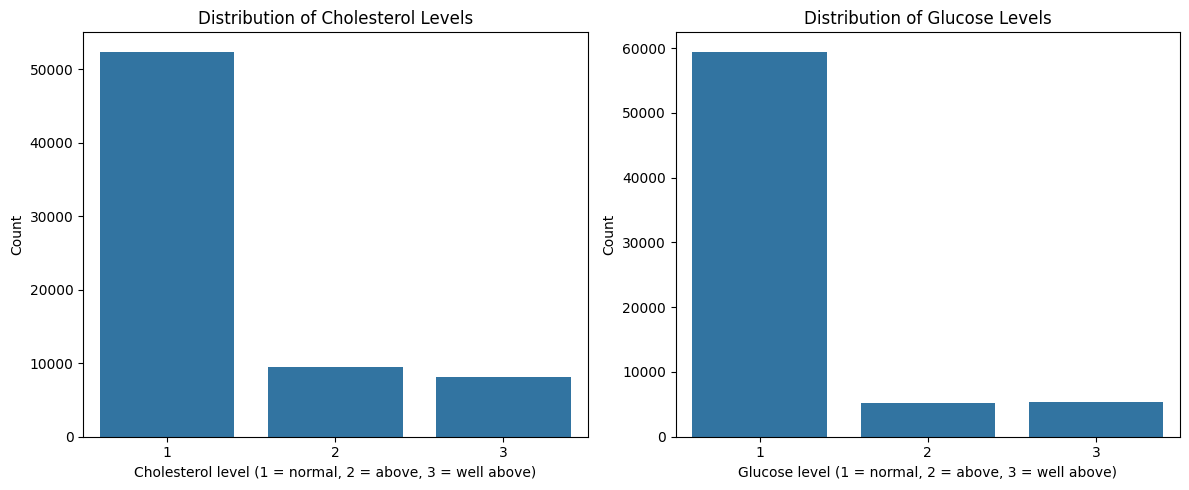

In [8]:
plt.figure(figsize=(12, 5))

# Cholesterol
plt.subplot(1, 2, 1)
sns.countplot(x='cholesterol', data=df)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol level (1 = normal, 2 = above, 3 = well above)')
plt.ylabel('Count')

# Glucose
plt.subplot(1, 2, 2)
sns.countplot(x='gluc', data=df)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose level (1 = normal, 2 = above, 3 = well above)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### **Analysis:**

#### Cholesterol Levels

##### Findings:
- The vast majority of patients fall into **level 1 (normal)**.
- Levels **2 (above)** and **3 (well above)** appear much less frequently.
- The distribution is strongly **left-skewed**, with most observations concentrated in the normal range.

##### Interpretation:
This indicates that most individuals in the dataset have **non-elevated cholesterol levels**. Elevated cases exist but represent a clear minority, which is typical for a general population sample.

---

#### Glucose Levels

##### Findings:
- Most participants are again in **level 1 (normal)**.
- Levels **2** and **3** occur slightly more often than for cholesterol but remain relatively small groups.
- The distribution shows a strong concentration in the normal range.

##### Interpretation:
This suggests that the majority of the population has **normal glucose levels**, though a noticeable subset shows elevated values, potentially indicating early signs of glucose regulation issues such as prediabetes.


### Distribution of systolic and diastolic blood pressure (raw values)

Here we inspect the raw distributions of systolic (`ap_hi`) and diastolic (`ap_lo`)
blood pressure.


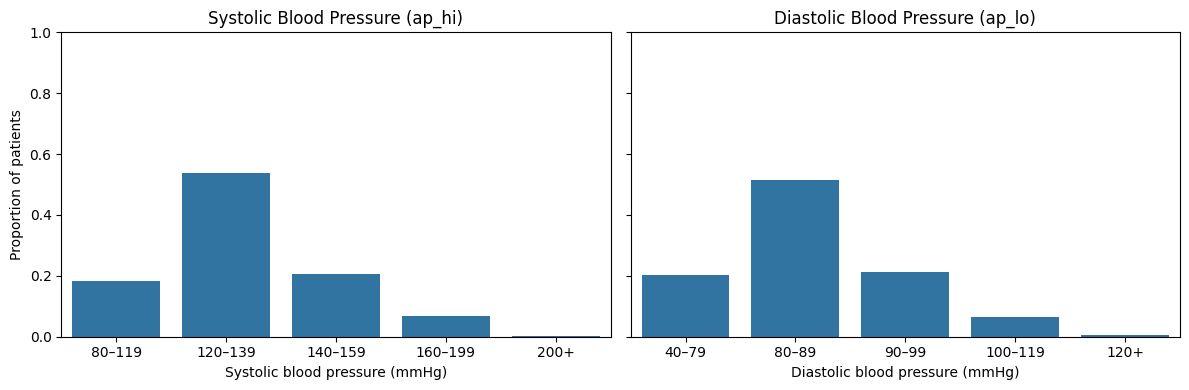

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bp_vars  = ['ap_hi', 'ap_lo']
titles   = ['Systolic Blood Pressure (ap_hi)', 'Diastolic Blood Pressure (ap_lo)']
xlabels  = ['Systolic blood pressure (mmHg)', 'Diastolic blood pressure (mmHg)']

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

for col, ax, title, xlabel in zip(bp_vars, axes, titles, xlabels):
    # Kategorien (Ranges) definieren
    if col == 'ap_hi':
        bins   = [80, 120, 140, 160, 200, 260]
        labels = ['80–119', '120–139', '140–159', '160–199', '200+']
    else:  # ap_lo
        bins   = [40, 80, 90, 100, 120, 260]
        labels = ['40–79', '80–89', '90–99', '100–119', '120+']

    # Werte in Kategorien einteilen
    cat = pd.cut(df[col], bins=bins, labels=labels, right=False, include_lowest=True)

    # **Proportion** pro Kategorie (kein *100)
    proportion = cat.value_counts(normalize=True).sort_index()

    # Säulendiagramm zeichnen
    sns.barplot(x=proportion.index, y=proportion.values, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Proportion of patients')
    ax.set_ylim(0, 1)   # Skala 0.0–1.0


plt.tight_layout()
plt.show()


### **Analysis:**

#### Systolic Blood Pressure (ap_hi)

##### Findings:
- Most patients fall into the **120–139 mmHg** and **140–159 mmHg** ranges.
- Lower systolic values (**80–119 mmHg**) and very high values (**≥160 mmHg**, especially **≥200 mmHg**) are much less frequent.
- The distribution is concentrated around slightly elevated to moderately elevated systolic blood pressure ranges.

##### Interpretation:
The sample shows a high proportion of individuals with **borderline or hypertensive systolic blood pressure**, which aligns with expectations for a cardiovascular-focused dataset. Extremely high values are present but occur only in a very small fraction of patients.

---

#### Diastolic Blood Pressure (ap_lo)

##### Findings:
- The majority of observations lie between **80–99 mmHg**.
- Very low values (**<80 mmHg**) and very high values (**≥100 mmHg**, especially **≥120 mmHg**) are rare.
- The distribution is centered around mildly elevated diastolic ranges.

##### Interpretation:
Most participants exhibit **elevated diastolic pressure**, consistent with a population at higher cardiovascular risk. Extreme diastolic values exist but represent only a small minority and do not significantly influence the overall distribution.


### **4.3 Lifestyle Variables**

#### Distribution of lifestyle variables (smoke, alco, active)

In this part, we look at how common different lifestyle-related behaviours are
in the dataset. All three variables are coded as binary indicators
(e.g. `0 = no`, `1 = yes`).

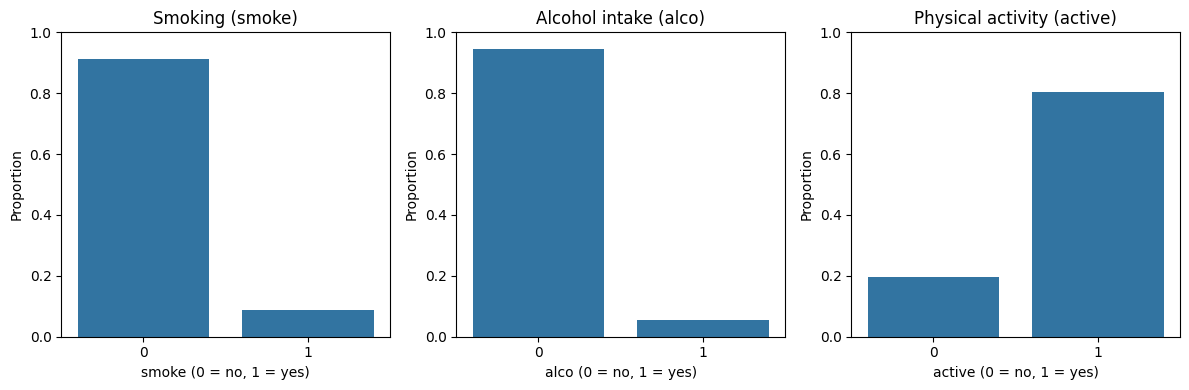

In [33]:
plt.figure(figsize=(12, 4))

lifestyle_vars = ['smoke', 'alco', 'active']
titles = ['Smoking (smoke)', 'Alcohol intake (alco)', 'Physical activity (active)']

for i, (col, title) in enumerate(zip(lifestyle_vars, titles), start=1):
    plt.subplot(1, 3, i)

    # Proportion statt Prozent
    counts = df[col].value_counts(normalize=True).sort_index()  # kein * 100

    # Balkendiagramm mit Proportionen
    sns.barplot(x=counts.index, y=counts.values)

    plt.title(title)
    plt.xlabel(f'{col} (0 = no, 1 = yes)')
    plt.ylabel('Proportion')
    plt.ylim(0, 1)  # Skala 0.0–1.0

plt.tight_layout()
plt.show()


### **Analysis:**

#### Smoking (smoke)

##### Findings:
- A large majority of patients (**91.2%**) report **not smoking**.
- Only **8.8%** of the population are active smokers.
- The distribution is highly unbalanced, with non-smokers clearly dominating.

##### Interpretation:
The dataset contains relatively few smokers, which may reduce the influence of smoking as a predictor. This distribution is typical for many health-focused datasets where smoking prevalence is lower than in the general population.

---

#### Alcohol Intake (alco)

##### Findings:
- **94.6%** of individuals report **no alcohol consumption**.
- Only **5.4%** indicate that they drink alcohol.
- The variable is extremely skewed toward non-drinkers.

##### Interpretation:
Alcohol intake is rare in this dataset. This strong imbalance suggests that alcohol consumption may have limited variability and therefore limited explanatory power in later modelling steps.

---

#### Physical Activity (active)

##### Findings:
- **80.4%** of participants report being **physically active**.
- **19.6%** indicate that they are not physically active.
- The distribution is still skewed, but less extreme compared to smoking and alcohol.

##### Interpretation:
Most individuals report regular physical activity, which aligns with typical self-reported lifestyle data. Although the majority is active, the variable has more balance than the other lifestyle features and may contribute more effectively to modelling behavioural patterns.


---
<span style="color: orange; font-size: 26px; font-weight: bold;">
5. Bivariate Analyses with Target Variable `cardio`
</span>

---


### **5.1 Age & Disease**

In this section, we examine how the risk of disease changes with age
and how the age distribution differs between patients with and without cardiovascular disease.


### Age Distribution of Patients with/without Cardiovascular Disease

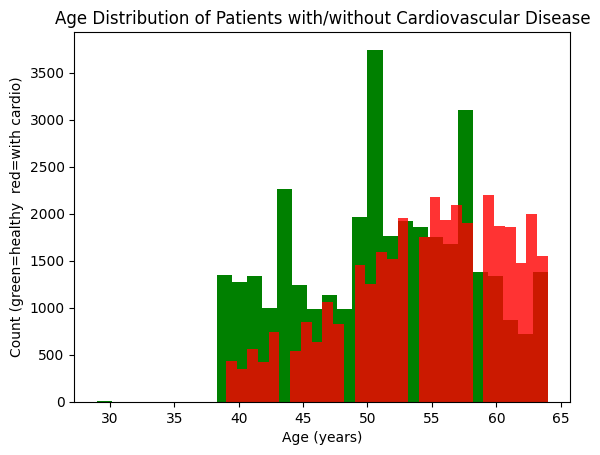

In [19]:
cardio_patients = df[df['cardio'] == 1]
no_cardio_patients = df[df['cardio'] == 0]

plt.hist(no_cardio_patients["age_years"], bins=30, color="green")
plt.hist(cardio_patients["age_years"], bins=30, color="red", alpha=0.8)

plt.title("Age Distribution with Outliers")
plt.title("Age Distribution of Patients with/without Cardiovascular Disease")
plt.xlabel("Age (years)")
plt.ylabel("Count (green=healthy  red=with cardio)")
plt.show()

### **Analysis:**

#### Age Distribution by Cardiovascular Disease Status

##### **Findings:**
- Healthy individuals (**green**) are more common at younger ages (under ~50 years).
- Patients with cardiovascular disease (**red**) increase steadily with age.
- The distributions for both groups overlap strongly but shift in opposite directions:  
  - green peaks earlier,  
  - red peaks later.
- After age 50, the number of individuals with cardiovascular disease becomes noticeably higher than the number of healthy individuals.


- **Interpretation:**
  The histogram shows that **healthy individuals (green)** are more prevalent at younger ages, while the **proportion of patients with cardiovascular disease (red)** increases with age.
  - After age 50, the number of individuals with cardiovascular disease begins to surpass the number of healthy individuals.
  - This trend reflects the well-established medical finding that **cardiovascular disease risk rises significantly with age**  (Rodgers, J.L.,et al 2019)

#### References:
**Source:** Rodgers, J.L., et al *Cardiovascular Risks Associated with Gender and Aging*. Aging and Disease. 2019 Apr 27;6(2):19. [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/)

#### Proportion of Cardiovascular Disease by Age Group

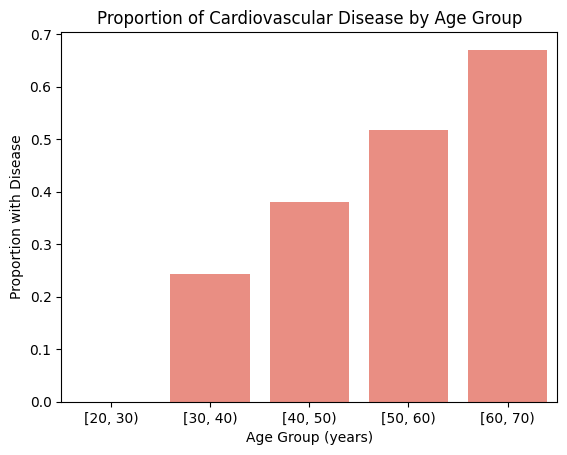

In [20]:
# Altersgruppen aus age_years bauen
bins = [20, 30, 40, 50, 60, 70]  # Grenzen wie im Plot
df['age_group'] = pd.cut(df['age_years'], bins=bins, right=False)


age_cardio = df.groupby('age_group', observed=False)['cardio'].mean().reset_index()

sns.barplot(x='age_group', y='cardio', data=age_cardio, color='salmon')
plt.title('Proportion of Cardiovascular Disease by Age Group')
plt.ylabel('Proportion with Disease')
plt.xlabel('Age Group (years)')
plt.show()

##### **Findings:**
- The proportion of cardiovascular disease rises steadily across age groups.
- The lowest prevalence appears in the **20–30** and **30–40** groups (~0.25–0.38).
- A sharp increase occurs from **40–50** to **50–60**, where prevalence exceeds 0.5.
- The highest proportion is in the **60–70** group (~0.67), indicating that nearly two-thirds of individuals in this range have cardiovascular disease.

##### **Interpretation:**
Cardiovascular disease prevalence increases strongly with age, showing a clear age-related risk pattern. Older age groups exhibit substantially higher rates, confirming age as a dominant and progressive risk factor in this dataset.


#### Proportion of Patients with/without Cardiovascular Disease:

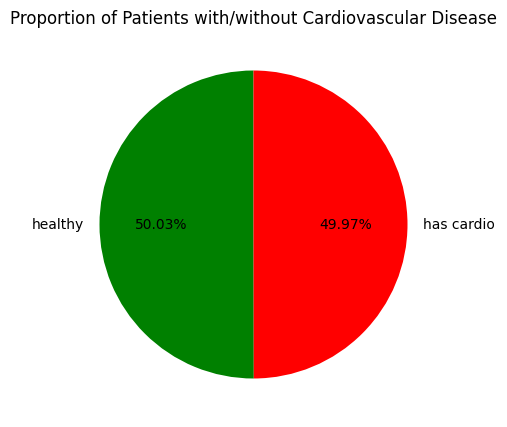

num_with_cardio: 
34979
num_without_cardio: 
35021


In [21]:
# Count how many with and without cardio
num_with_cardio = (df['cardio'] == 1).sum()
num_without_cardio = (df['cardio'] == 0).sum()

# Prepare values and labels in the order you want
sizes = [num_without_cardio, num_with_cardio]
labels = ["healthy", "has cardio"]
colors = ["green", "red"]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title("Proportion of Patients with/without Cardiovascular Disease")
plt.show()
print("num_with_cardio: ")
print(num_with_cardio)
print("num_without_cardio: ")
print(num_without_cardio)


#### Overall Proportion of Cardiovascular Disease

##### Findings:
- The dataset is almost **perfectly balanced** between healthy individuals and patients with cardiovascular disease.  
  - **Healthy:** ~50.03%  
  - **Has cardio:** ~49.97%
- The difference between the two groups is negligible (<0.1 percentage points).

##### Interpretation:
The near 50/50 split between healthy and diseased patients means the dataset is **well balanced for binary classification**, reducing the risk of bias toward one class during model training.


### 5.2 Gender & Disease

Here, we analyze how the proportion of patients with cardiovascular disease differs between
**men** and **women**.


### Proportion of Sick/Healthy by Gender


sick men:  12363
sick women:  22616
Proportion of men with cardio: 0.5
Proportion of women with cardio: 0.5


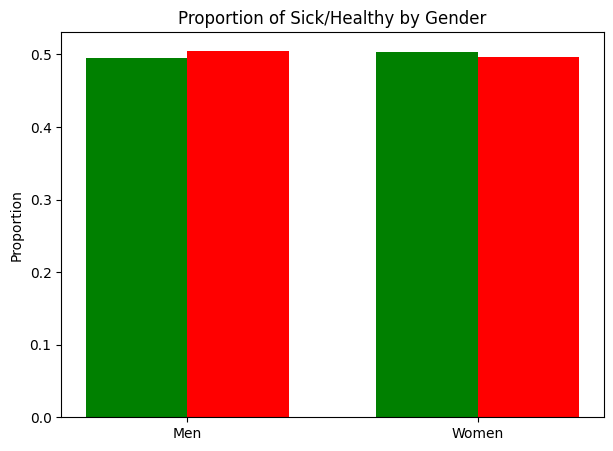

In [22]:
# Total counts
total_men = (df['gender'] == 2).sum()
total_women = (df['gender'] == 1).sum()

# With cardio
sick_men = ((df['gender'] == 2) & (df['cardio'] == 1)).sum()
sick_women = ((df['gender'] == 1) & (df['cardio'] == 1)).sum()

# healthy men and women
healthy_men = ((df['gender'] == 2) & (df['cardio'] == 0)).sum()
healthy_women = ((df['gender'] == 1) & (df['cardio'] == 0)).sum()

# Rates (as decimals or percent)
sick_men_rate = sick_men / total_men
sick_women_rate = sick_women / total_women
healthy_men_rate = healthy_men / total_men
healthy_women_rate = healthy_women / total_women


print("sick men: ", sick_men)
print("sick women: ", sick_women)

print(f"Proportion of men with cardio: {sick_men_rate:.1f}")
print(f"Proportion of women with cardio: {healthy_women_rate:.1f}")

labels = ['Men', 'Women']
healthy = [healthy_men_rate, healthy_women_rate]

sick = [sick_men_rate, sick_women_rate]

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(7,5))
plt.bar(x - width/2, healthy, width, label='Healthy', color='green')
plt.bar(x + width/2, sick, width, label='Sick', color='red')
plt.xticks(x, labels)
plt.ylabel('Proportion')
plt.title('Proportion of Sick/Healthy by Gender')
plt.show()



### **Analysis:**

##### Findings:
- The proportion of cardiovascular disease is nearly **identical** between men and women:  
  - **Men with disease:** 0.5  
  - **Women with disease:** 0.5  
- Both genders show a similar balance between healthy (green) and sick (red) individuals.
- There is **no noticeable gender-based difference** in disease prevalence within this dataset.

##### Interpretation:
Gender does not appear to influence cardiovascular disease prevalence in this sample. Men and women exhibit almost identical proportions of affected individuals, indicating that gender alone is not a distinguishing risk factor in this dataset.
However, it is important to note that more women than men were included in the dataset.


### cardiovascular disease and Age Correlation

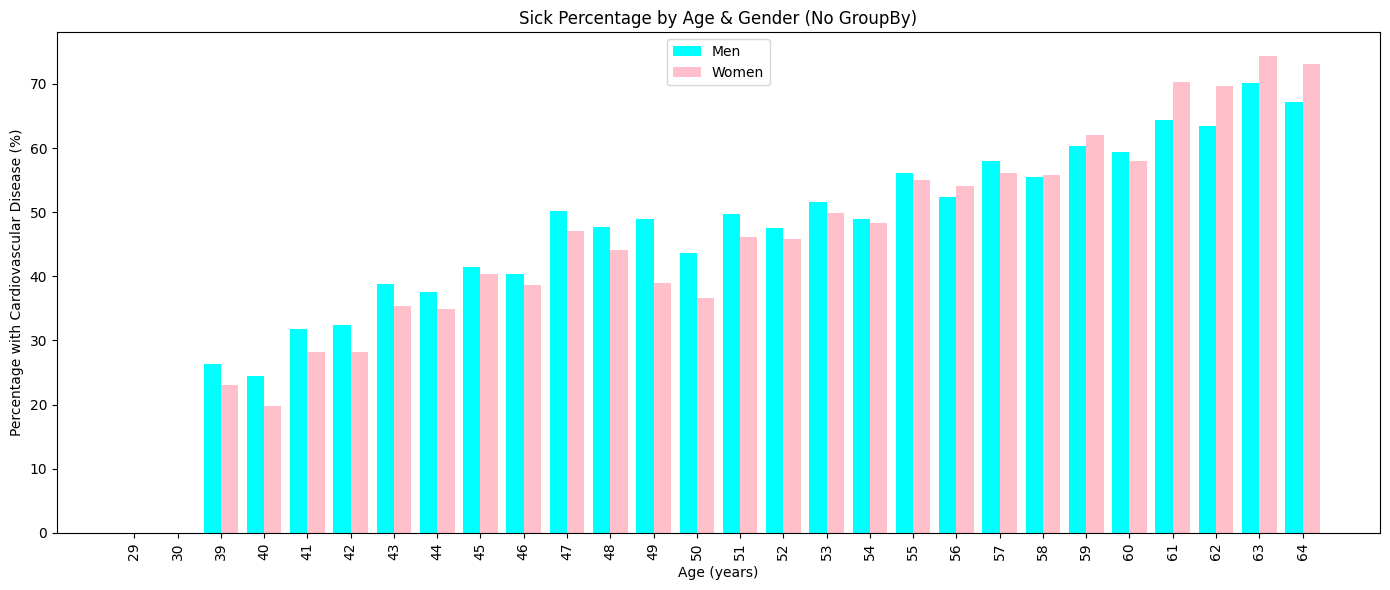

In [23]:
# create a list with all ages provided in the database with no duplications
ages = sorted(df['age_years'].unique()) # is a list of all unique age values in your dataset, sorted in order
# create empty lists to save sick men and women
pct_sick_men = []
pct_sick_women = []

# for each year/age in our ages list, we save a list for women a men at this age
for age in ages:

                # age of person == list age     and     gender is male
    men = df[    ( df['age_years'] == age )     &     ( df['gender'] == 2 )   ]
                # age of person == list age     and    gender is female
    women = df[  ( df ['age_years'] == age)     &     ( df['gender'] == 1 )   ]

# do the following:

     # Calculate percentage sick for women at this age
    men_total = len(men)
    men_sick = men['cardio'].sum() # number of sick men




    if men_total > 0: # if there are men at this age:
        pct_sick_men.append(100 * men_sick / men_total) # calculate % and add it to the list
    else:
        pct_sick_men.append(np.nan)  # No men at this age, ad a nan

    # Calculate percentage sick for women at this age
    women_total = len(women)
    women_sick = women['cardio'].sum()




    if women_total > 0: # if there are men at this age:
        pct_sick_women.append(100 * women_sick / women_total)
    else:
        pct_sick_women.append(np.nan)  # No women at this age

# Plot
x = np.arange(len(ages)) # len(ages) gives you how many different ages there are
plt.figure(figsize=(14,6))
plt.bar(x - 0.2, pct_sick_men, width=0.4, color='cyan', label='Men')
plt.bar(x + 0.2, pct_sick_women, width=0.4, color='pink', label='Women')
plt.xlabel('Age (years)')
plt.ylabel('Percentage with Cardiovascular Disease (%)')
plt.title('Sick Percentage by Age & Gender (No GroupBy)')
plt.xticks(x, ages, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### **Analysis:**

##### Findings:
- The percentage of people with cardiovascular disease **increases sharply with age** for both men and women.
- At younger ages (around **30–45 years**), disease rates are moderate (roughly **20–40%**).
- After about **55 years**, the proportion rises steeply, exceeding **50%** and reaching around **70%+** in the oldest ages.
- Among **younger adults**, men tend to have **slightly higher** disease rates than women.
- In **older age groups (60+)**, the difference between men and women becomes smaller, and in some ages women even show **equal or higher** rates than men.

##### Interpretation:
Age is a strong driver of cardiovascular disease risk for **both genders**, with prevalence rising from moderate levels in early adulthood to very high levels in older age. Men appear somewhat more affected at younger ages, while in later life the gap between men and women narrows and can even reverse for specific ages. This pattern suggests that both age and gender should be considered jointly when assessing cardiovascular risk.


### **5.3 Clinical & lifestyle factors vs. cardio**

- Proportion **`cardio = 1`** per **cholesterol level** (`cholesterol`)
- Proportion **`cardio = 1`** per **glucose level** (`gluc`)


#### **5.3.1 Clinical variables vs `cardio`**

In this part we analyse how the proportion of patients with `cardio = 1`
changes across different levels of `cholesterol` and `gluc`.


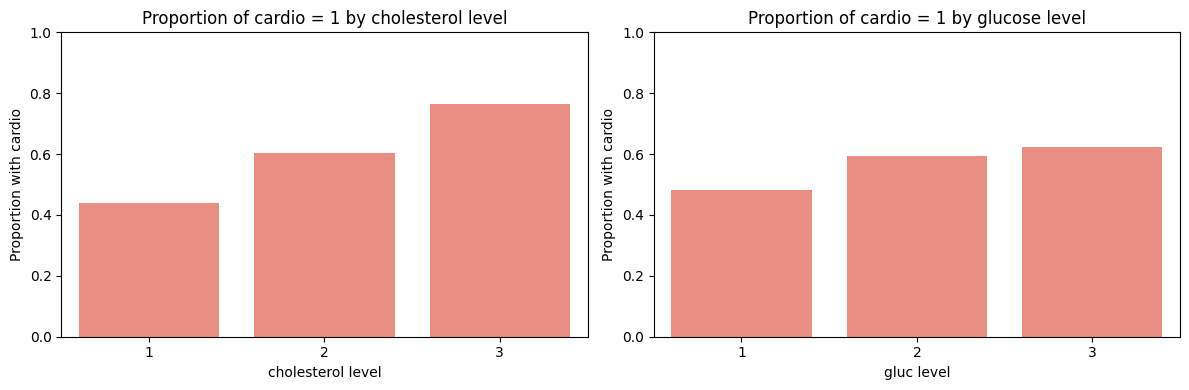

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clinical variables and their titles
clinical_vars = ['cholesterol', 'gluc']
titles = [
    'Proportion of cardio = 1 by cholesterol level',
    'Proportion of cardio = 1 by glucose level'
]

plt.figure(figsize=(12, 4))

for i, (col, title) in enumerate(zip(clinical_vars, titles), start=1):
    # Proportion of cardio = 1 per category
    prop = df.groupby(col, observed=False)['cardio'].mean().reset_index()

    plt.subplot(1, 2, i)
    sns.barplot(x=col, y='cardio', data=prop, color='salmon')
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel(f'{col} level')
    plt.ylabel('Proportion with cardio')

plt.tight_layout()
plt.show()


#### Clinical Variables vs. cardio

### **Analysis:**

##### Findings:
- For both **cholesterol** and **glucose**, the proportion of patients with cardiovascular disease (**cardio = 1**) increases as the level rises.
- Individuals in **level 1 (normal)** show the lowest disease proportion.
- Levels **2 (above normal)** and **3 (well above)** show noticeably higher proportions, with level 3 consistently having the highest risk.
- The pattern is similar for both variables, although cholesterol shows a slightly stronger increase than glucose.

##### Interpretation:
Higher cholesterol and glucose levels are clearly associated with a higher likelihood of cardiovascular disease. This aligns with clinical expectations, reinforcing both variables as meaningful risk indicators within this dataset.


#### **5.3.2 Lifestyle variables vs `cardio`**

Now we look at how the probability of `cardio = 1` changes with
smoking, alcohol intake and physical activity.


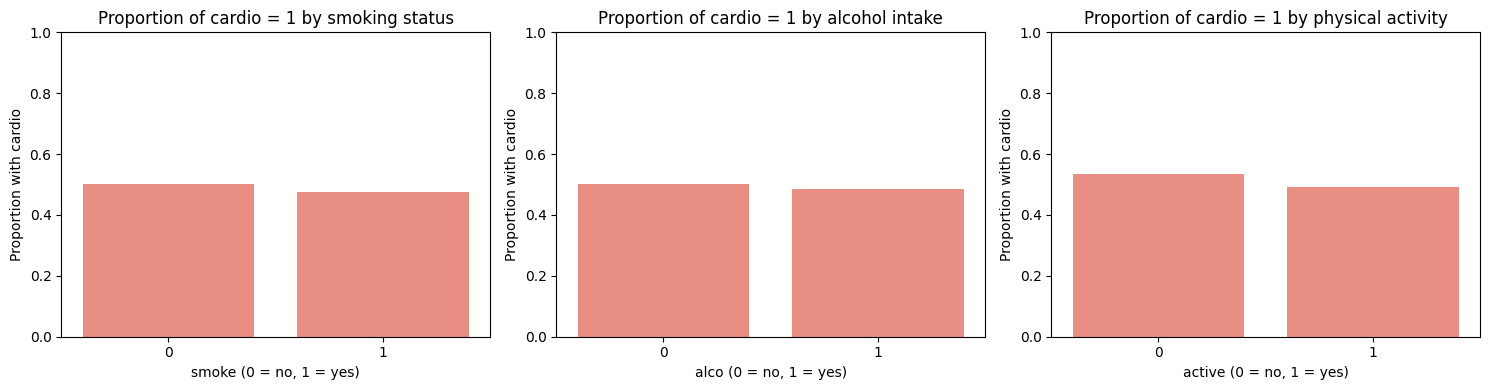

In [25]:
lifestyle_vars = ['smoke', 'alco', 'active']
titles = [
    'Proportion of cardio = 1 by smoking status',
    'Proportion of cardio = 1 by alcohol intake',
    'Proportion of cardio = 1 by physical activity'
]

plt.figure(figsize=(15, 4))

for i, (col, title) in enumerate(zip(lifestyle_vars, titles), start=1):
    # Proportion of cardio = 1 per category (0/1)
    prop = df.groupby(col, observed=False)['cardio'].mean().reset_index()

    plt.subplot(1, 3, i)
    sns.barplot(x=col, y='cardio', data=prop, color='salmon')
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel(f'{col} (0 = no, 1 = yes)')
    plt.ylabel('Proportion with cardio')

plt.tight_layout()
plt.show()


### **Analysis:**

#### Lifestyle Variables vs. cardio

##### Findings:
- **Smoking:** The proportion of cardiovascular disease is almost the same for smokers and non-smokers, showing only a very small difference.
- **Alcohol intake:** Patients who consume alcohol (alco = 1) show a slightly higher proportion of cardiovascular disease compared to non-drinkers, but the difference is minimal.
- **Physical activity:** Physically active individuals (active = 1) have a slightly lower proportion of cardiovascular disease compared to inactive individuals, though the difference remains small.

##### Interpretation:
Lifestyle-related variables—smoking, alcohol consumption, and physical activity—show only **weak associations** with cardiovascular disease in this dataset. While small differences exist, they are minor compared to the influence of major clinical factors such as age, cholesterol, and glucose. Lifestyle variables still contribute to understanding individual risk profiles but do not appear to be strong standalone predictors.


---


<span style="color: orange; font-size: 26px; font-weight: bold">6. Outlier Analysis</span>


In this section, outliers of the most important numerical variables are examined
(e.g. weight, height, blood pressure values).


### 1. Weight outliers

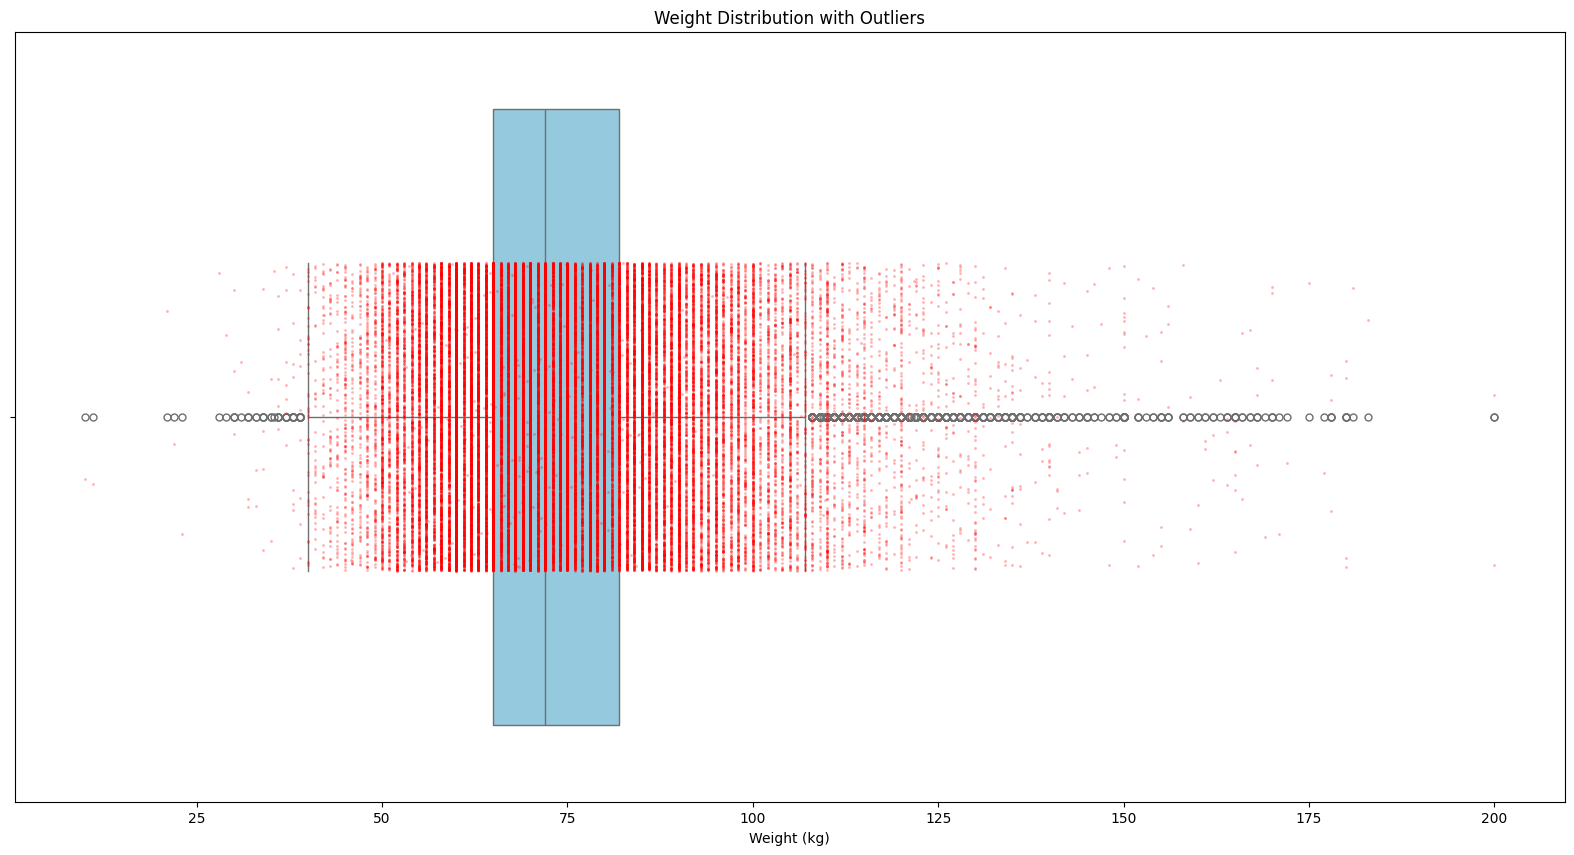

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['weight'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['weight'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Weight Distribution with Outliers")
plt.xlabel("Weight (kg)")
plt.show()

### 2. Height outliers


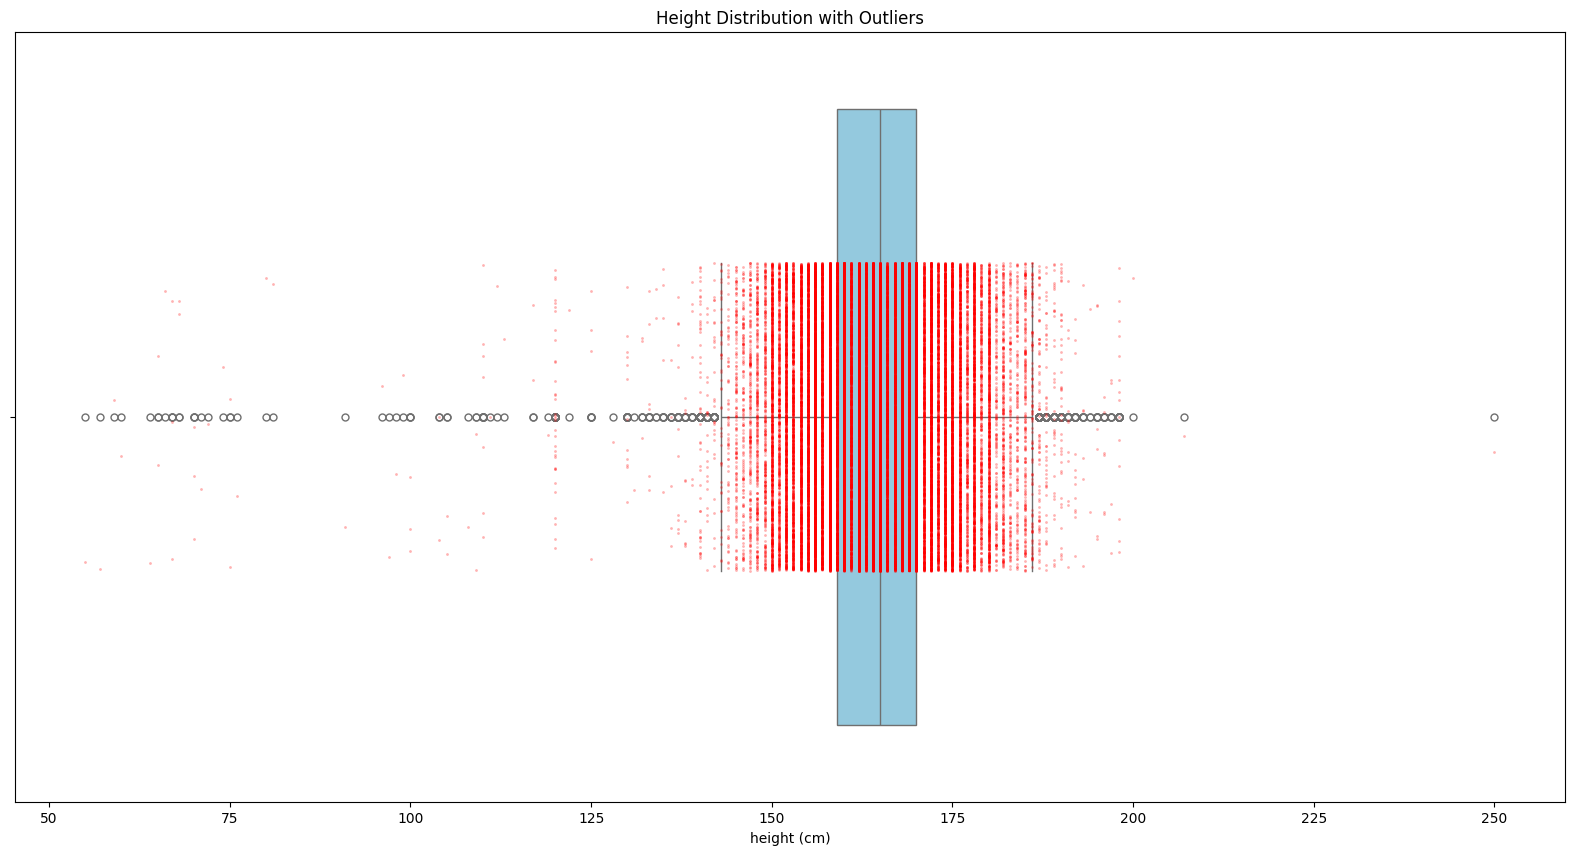

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['height'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['height'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Height Distribution with Outliers")
plt.xlabel("height (cm)")
plt.show()

### 3. Age outliers

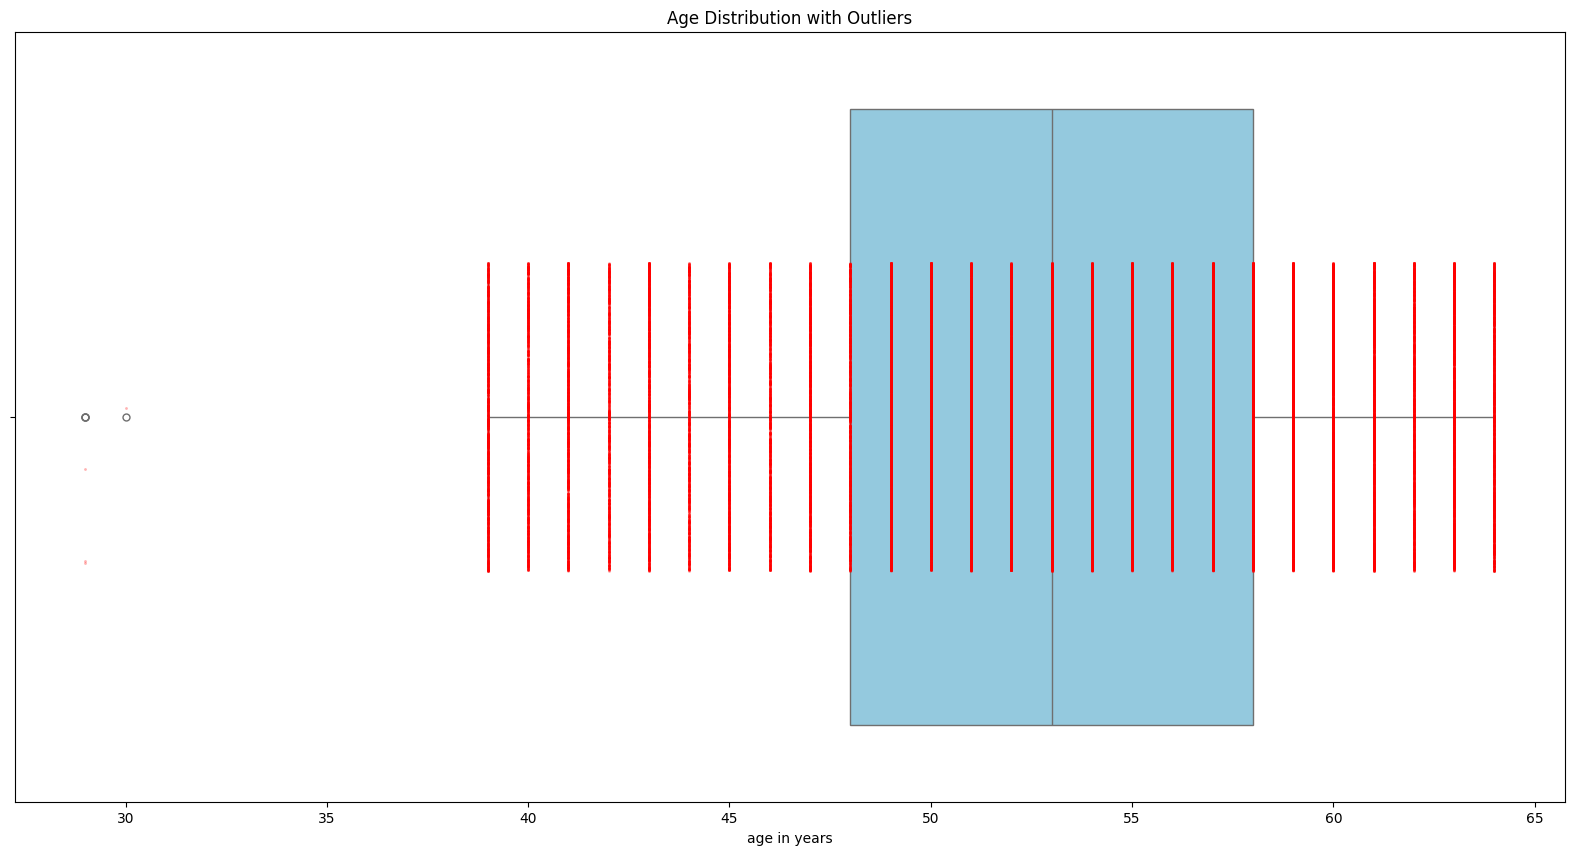

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['age_years'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['age_years'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Age Distribution with Outliers")
plt.xlabel("age in years")
plt.show()

###  Systolic blood pressure, Diastolic blood pressure outliers:

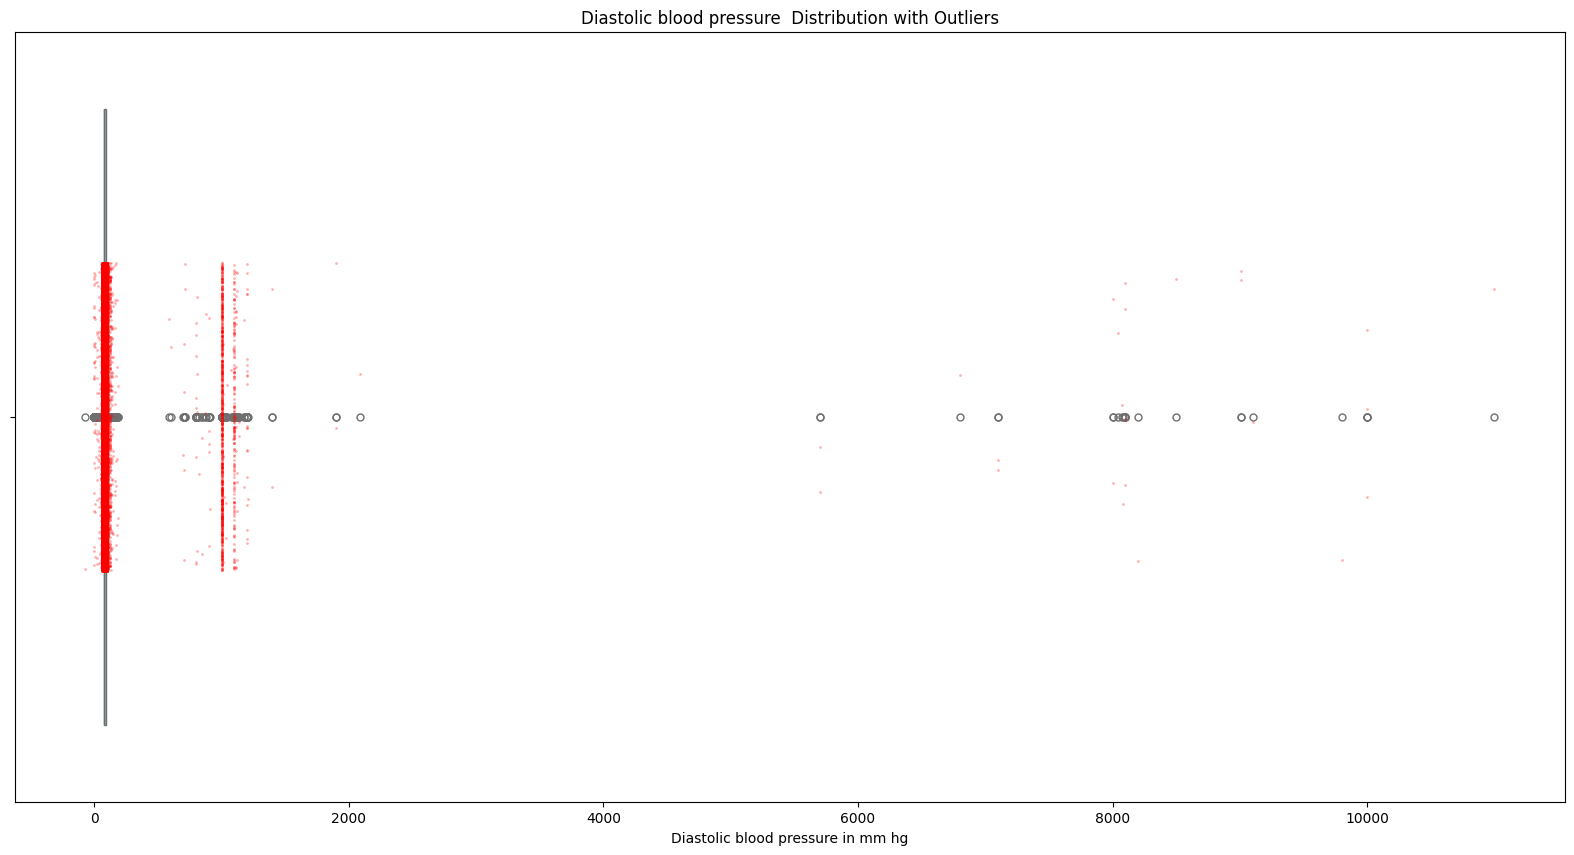

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['ap_lo'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['ap_lo'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Diastolic blood pressure  Distribution with Outliers")
plt.xlabel("Diastolic blood pressure in mm hg")
plt.show()

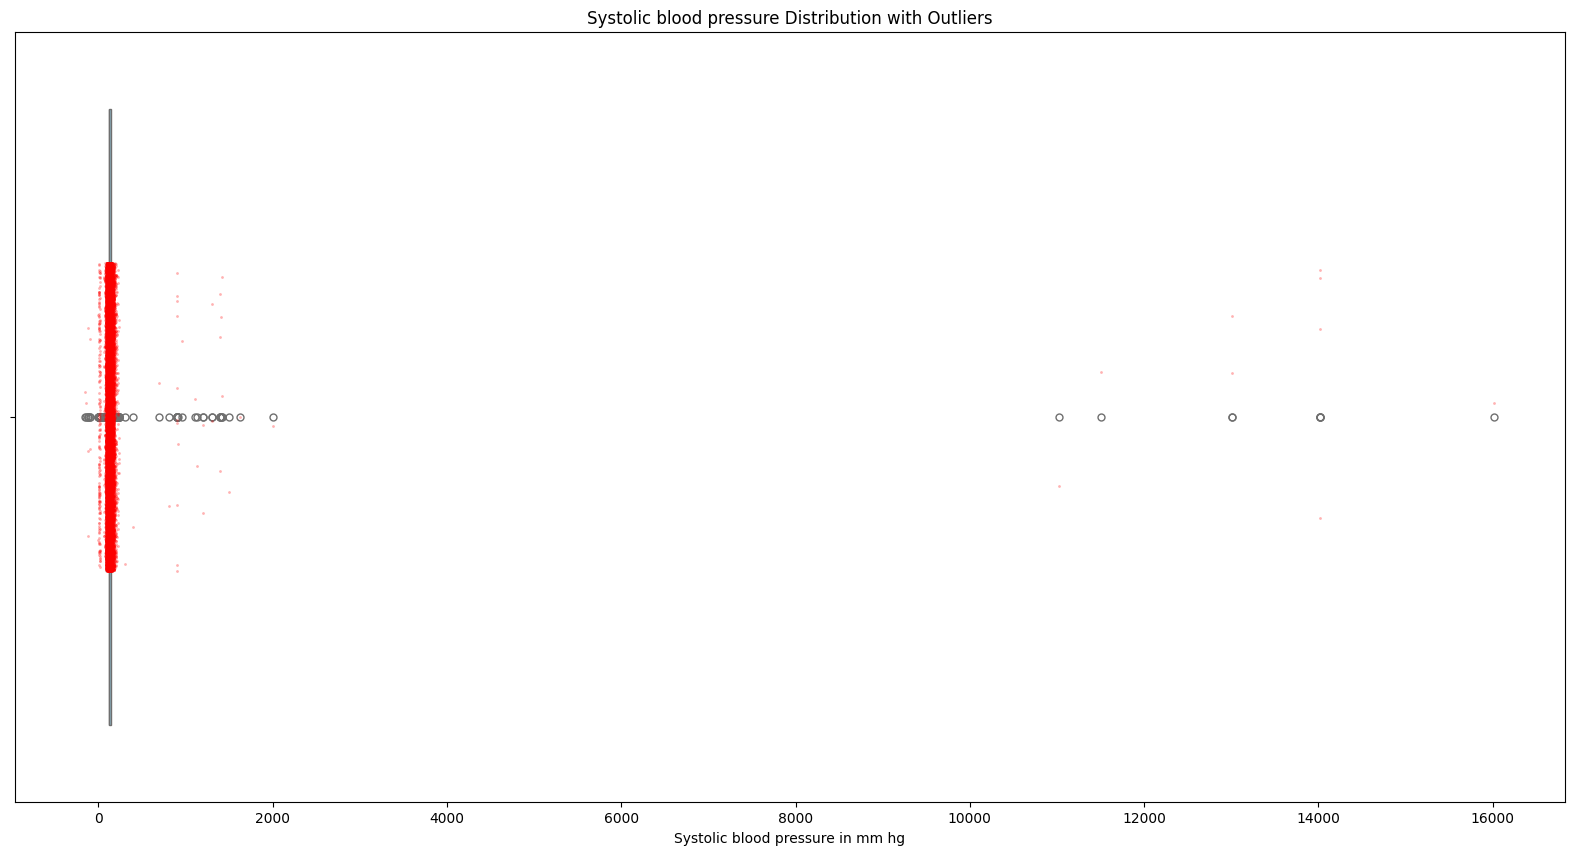

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['ap_hi'], color='skyblue', fliersize=5)  # shows outliers as dots
sns.stripplot(x=df['ap_hi'], color='red', alpha=0.3, jitter=0.2, size=2)
plt.title("Systolic blood pressure Distribution with Outliers")
plt.xlabel("Systolic blood pressure in mm hg")
plt.show()

### **Analysis:**

### Height, Weight, and Age Distributions

- **Outliers Detected:**
  All three distributions—height, weight, and age—show clear evidence of outliers.
  - **Height:**
    - Most values cluster tightly around 150–180cm, but there are extreme values below 100cm and above 200cm, which are likely data entry errors or rare pathological cases.
  - **Weight:**
    - The majority of observations fall between 50–110kg, yet there are values far below 40kg and above 150kg, some even reaching extreme ranges unlikely for adults.
  - **Age:**
    - Age distribution is more compact, centered around 45–60 years, but there are some outliers at both the lower and upper ends of the range.

- **Clinical or Data Quality Relevance:**
  - Many of these outlier values are probably **implausible in a clinical context** and suggest either data entry issues or rare extreme cases.
  - Including such outliers in further modeling can bias results and distort statistical inferences.

### Blood Pressure Distributions (Systolic and Diastolic)

- **Severe Outliers:**
  - Both systolic and diastolic blood pressure variables show values that are biologically impossible (e.g., >10,000mmHg), confirming severe data quality problems.
  - The bulk of values are concentrated around expected physiological ranges (e.g., 80–200mmHg), but the presence of these outliers is visually clear and concerning.

- **Actionable Recommendation:**
  - Outliers should be **systematically removed or winsorized** before further analysis or modeling.
  - Failure to do so may negatively affect any machine learning model’s performance and clinical interpretability.


All variables examined exhibit significant outliers that are likely the result of data entry errors. Identifying and appropriately handling these outliers is a crucial next step in the data cleaning process to ensure robust and meaningful analytical results.

### References
Johnson, H. M., et al. "Maintaining Normal Blood Pressure Across the Life Course." *Current Hypertension Reports* (2021): 1-3. [Link](hhttps://pmc.ncbi.nlm.nih.gov/articles/PMC8564773/?.com)


---
<span style="color: orange; font-size: 26px; font-weight: bold;">
7. Correlation Heatmap (All Numeric Features)
</span>

---



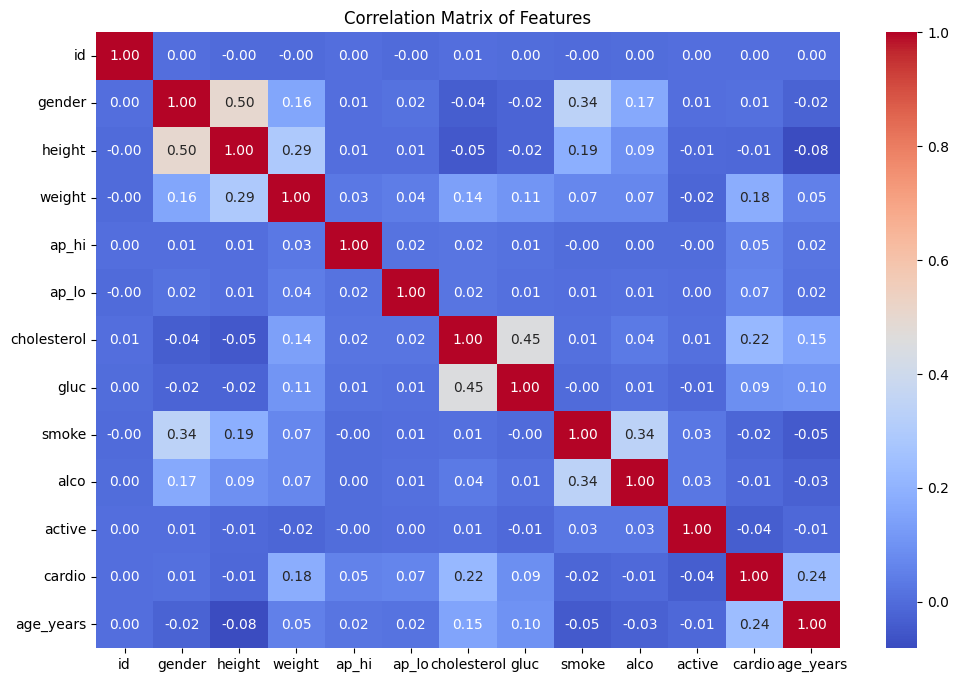

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

#### **Analysis:**

Correlation with Cardiovascular Disease (`cardio`):

| **Feature**   | **Correlation with `cardio`** | **Strength**     | **Interpretation / Comment**                         |
|---------------|-------------------------------|------------------|------------------------------------------------------|
| age / age_years| 0.24                          | moderate         | Older age increases risk of cardiovascular disease   |
| cholesterol   | 0.22                          | moderate         | Higher cholesterol moderately linked to disease      |
| weight        | 0.18                          | weak-moderate    | Higher weight slightly increases risk                |
| ap_hi         | 0.05                          | weak             | Systolic blood pressure has minor effect             |
| ap_lo         | 0.07                          | weak             | Diastolic blood pressure has minor effect            |
| gluc          | 0.09                          | weak             | Higher glucose slightly increases risk               |
| gender        | 0.01                          | none             | Gender has almost no linear effect                   |
| smoke         | -0.02                         | none             | Smoking not correlated (in this dataset)             |
| alco          | -0.04                         | none             | Alcohol not correlated (in this dataset)             |
| active        | -0.04                         | none             | Physical activity not correlated (in this dataset)   |

**Note:**
- The strongest correlations with cardiovascular disease are age, cholesterol, and weight — but even these are only moderate.
- Most other features show weak or no linear relationship, suggesting the need for more complex models to capture interactions.

#### Correlation of Features with Cardiovascular Disease (Bar Plot)

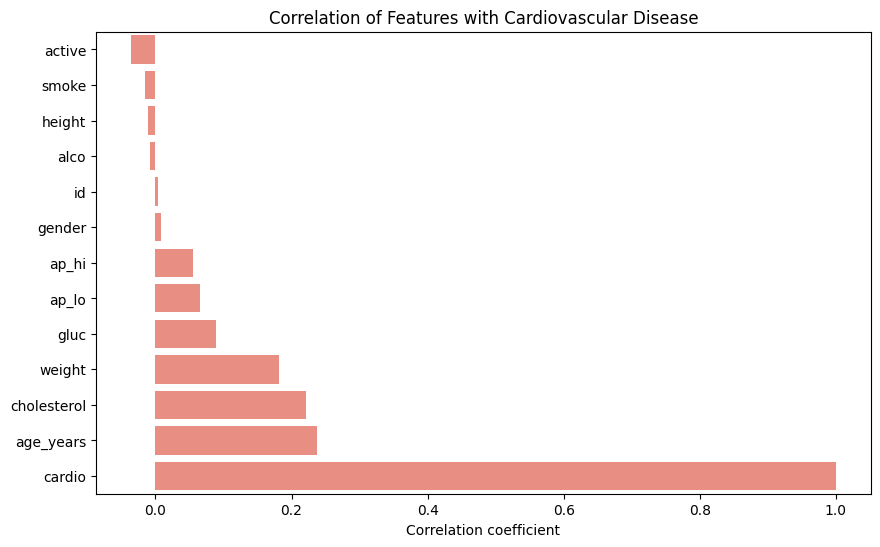

In [39]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

corr_with_cardio = corr_matrix['cardio'].sort_values()

corr_df = corr_with_cardio.reset_index()
corr_df.columns = ['feature', 'correlation']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='correlation',
    y='feature',
    data=corr_df,
    orient='h',
    color='salmon'
)
plt.title('Correlation of Features with Cardiovascular Disease')
plt.xlabel('Correlation coefficient')
plt.ylabel('')
plt.show()


### **Analysis:**

#### Correlation of Features with Cardiovascular Disease

##### Findings:
- **Age** shows the strongest positive correlation with cardiovascular disease (~0.23), indicating that risk increases with age.
- **Cholesterol** and **weight** also exhibit moderate positive correlations, suggesting meaningful associations with disease presence.
- **Glucose**, **blood pressure (ap_hi, ap_lo)**, and **gender** display weaker but still positive correlations.
- Lifestyle factors such as **alcohol intake**, **smoking**, and **physical activity** show **very low correlations**, indicating minimal linear relationship with the outcome.
- All correlations aside from the target variable itself remain below 0.3, revealing generally weak linear relationships across features.

##### Interpretation:
The strongest predictors in a linear sense are **age**, **cholesterol**, and **weight**, consistent with established cardiovascular risk factors. Other variables—especially lifestyle indicators—exhibit minimal correlation, suggesting that their relationship with cardiovascular disease may be nonlinear or influenced by other interacting variables. Overall, the dataset shows that no single feature (besides age) has a strong linear contribution to disease risk.


---

<span style="color: orange; font-size: 26px; font-weight: bold;">
8. EDA Summary</span>

- **Sample structure:**  
  The dataset contains 70,000 patients aged mainly between 30 and 70 years. Women are more represented than men.

- **Data quality:**  
  No missing values are present. However, unrealistic values exist in height, weight, and blood pressure (ap_hi, ap_lo), indicating the need for outlier cleaning.

- **Univariate patterns:**  
  Most patients have normal cholesterol and glucose levels (level 1), while elevated levels (2–3) appear less frequently. Lifestyle variables (smoke, alco, active) are strongly imbalanced but usable.

- **Age effects:**  
  Cardiovascular disease risk increases clearly with age. Prevalence is moderate at young ages (20–40%), rises sharply after 50, and exceeds 60–70% in the oldest groups.

- **Gender differences:**  
  Cardiovascular disease prevalence is almost identical for men and women. Gender is not a strong risk indicator in this dataset.

- **Clinical variables vs. disease:**  
  Higher cholesterol and glucose levels are associated with a higher proportion of cardiovascular disease. These variables show meaningful risk patterns.

- **Correlations:**  
  The strongest linear correlations with cardiovascular disease are found for age, cholesterol, and weight. Blood pressure and lifestyle variables show weak linear correlations.

- **Overall insight:**  
  Age, cholesterol, glucose, and weight emerge as the most relevant risk-related features, while lifestyle behaviours show only minor effects. Outlier correction is necessary before modelling.

